In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from pandas import DataFrame
from pandas import concat
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

In [2]:
#element data(not used in analysis)
df = pd.read_csv("superconduct/unique_m.csv")

In [3]:
#read data
data = pd.read_csv("superconduct/train.csv")
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
#check for na values & if preprocessing is need 
data.isnull().sum().sum() 

0

In [5]:
#obtain mean of features of each property
new_data = pd.DataFrame(np.zeros((8, 10)))

for i in range(10):
    new_data[i][0] = data.mean().tolist()[i+1]
    new_data[i][1] = data.mean().tolist()[i+11]      
    new_data[i][2] = data.mean().tolist()[i+21]      
    new_data[i][3] = data.mean().tolist()[i+31]      
    new_data[i][4] = data.mean().tolist()[i+41]      
    new_data[i][5] = data.mean().tolist()[i+51]      
    new_data[i][6] = data.mean().tolist()[i+61]      
    new_data[i][7] = data.mean().tolist()[i+71]

new_data.index = ["Atomic_Mass","First Ionization Energy","Atomic_Radius","Density","Electron Affinity",
                 "Fusion Heat","Thermal Conductivity","Valence"]
new_data.columns = ["Mean","Weighted mean","Geometric mean","Weight geometric mean",
                   "Entropy","Weighted entropy","Range","Weighted range","Standard deviation",
                   "Weight standard deviation"]
new_data

,Mean,Weighted mean,Geometric mean,Weight geometric mean,Entropy,Weighted entropy,Range,Weighted range,Standard deviation,Weight standard deviation
Atomic_Mass,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045
First Ionization Energy,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033
Atomic_Radius,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465
Density,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628
Electron Affinity,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356
Fusion Heat,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576
Thermal Conductivity,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051
Valence,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987


In [6]:
data.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


In [7]:
#variance inflation factor
constant = add_constant(data.drop("critical_temp",axis=1))
v = pd.DataFrame([variance_inflation_factor(constant.values,i) for i in range(constant.shape[1])], index = constant.columns)
v.columns = ["VIF Score"]
v.drop(["const"]).sort_values(by = "VIF Score",ascending = False)

,VIF Score
wtd_mean_fie,8433.871750
wtd_gmean_fie,5748.351774
wtd_mean_Valence,5060.212354
wtd_gmean_atomic_radius,4919.172153
wtd_gmean_Valence,4327.279731
...,...
wtd_range_Valence,26.150907
wtd_range_atomic_mass,24.351696
wtd_range_ElectronAffinity,24.200955
wtd_range_atomic_radius,21.443059


In [8]:
v.drop("const")

,VIF Score
number_of_elements,79.644423
mean_atomic_mass,414.277383
wtd_mean_atomic_mass,818.370293
gmean_atomic_mass,444.203673
wtd_gmean_atomic_mass,879.861538
...,...
wtd_entropy_Valence,307.311308
range_Valence,56.759455
wtd_range_Valence,26.150907
std_Valence,96.823865


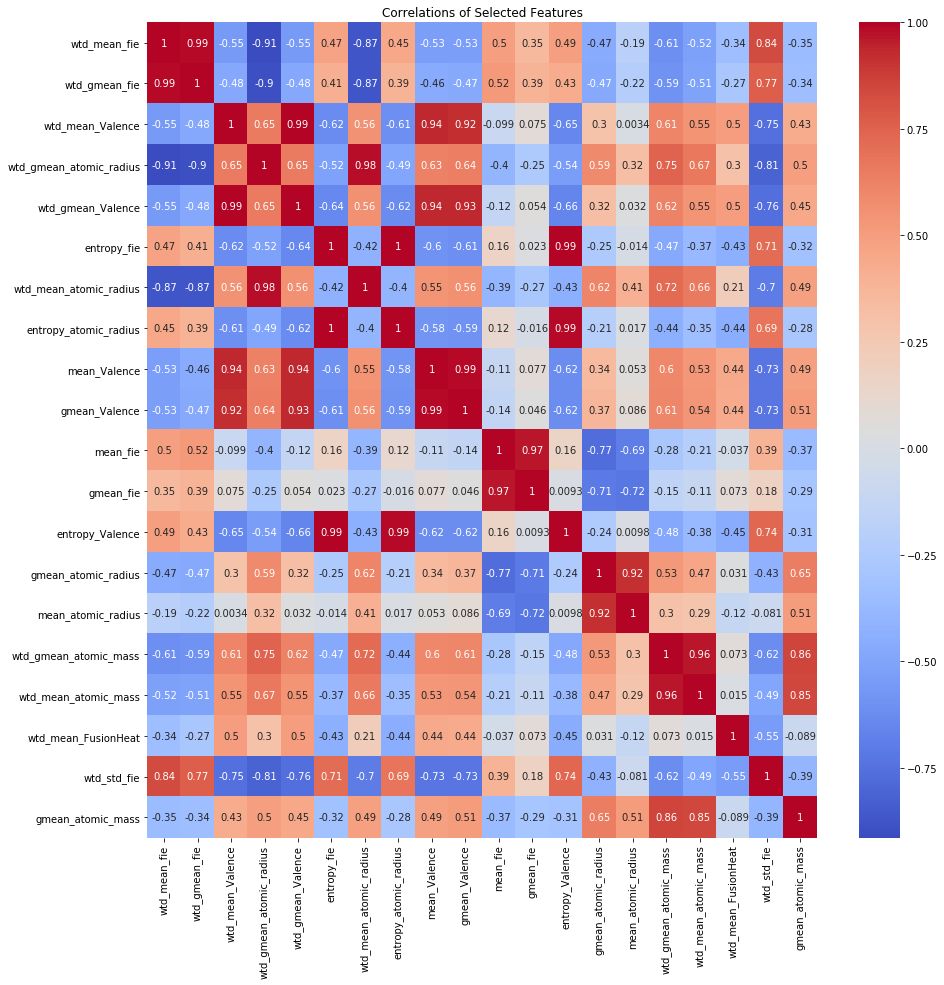

In [9]:
#plot correlation of 20 variables with highest VIF
v_20 = v.drop('const').sort_values(by = "VIF Score",ascending = False).head(20)
v20_corr = data[v_20.index.tolist()].corr()

plt.figure(figsize=[15,15])
sns.heatmap(v20_corr, annot=True, cmap="coolwarm")
plt.title('Correlations of Selected Features')
plt.show()

In [10]:
#subset into property
mass = data.iloc[:,1:11]
fie = data.iloc[:,11:21]
radius = data.iloc[:,21:31]
density = data.iloc[:,31:41]
electron = data.iloc[:,41:51]
fusion = data.iloc[:,51:61]
thermal = data.iloc[:,61:71]
valence = data.iloc[:,71:81]

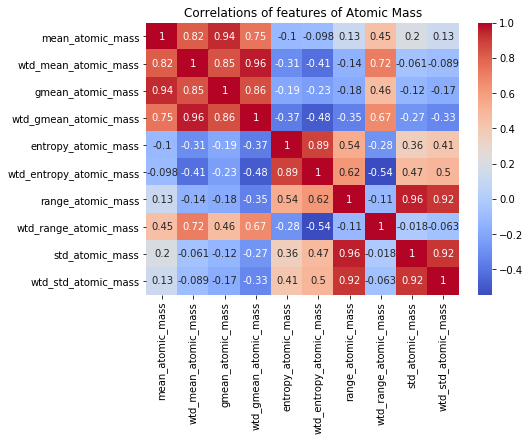

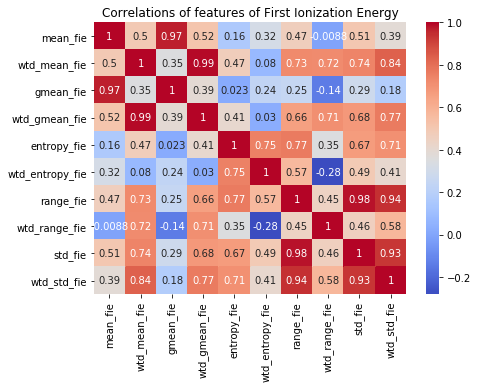

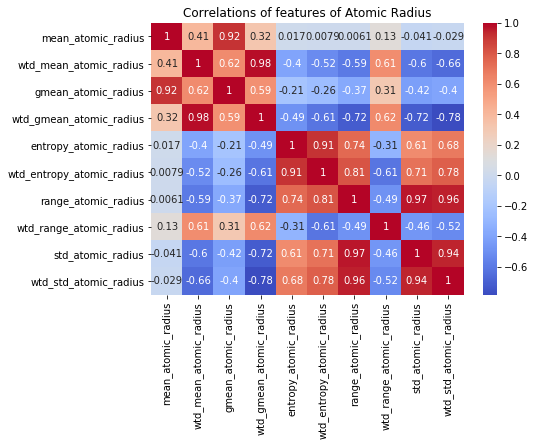

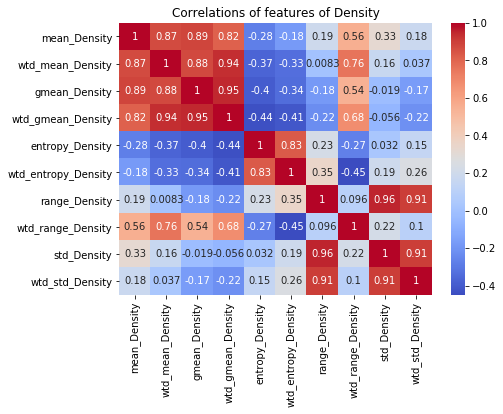

In [11]:
#correlation map of property with their features
plt.figure(figsize=[7,5])
sns.heatmap(mass.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Atomic Mass')
plt.show()
plt.figure(figsize=[7,5])
sns.heatmap(fie.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of First Ionization Energy')
plt.show()
plt.figure(figsize=[7,5])
sns.heatmap(radius.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Atomic Radius')
plt.show()
plt.figure(figsize=[7,5])
sns.heatmap(density.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Density')
plt.show()

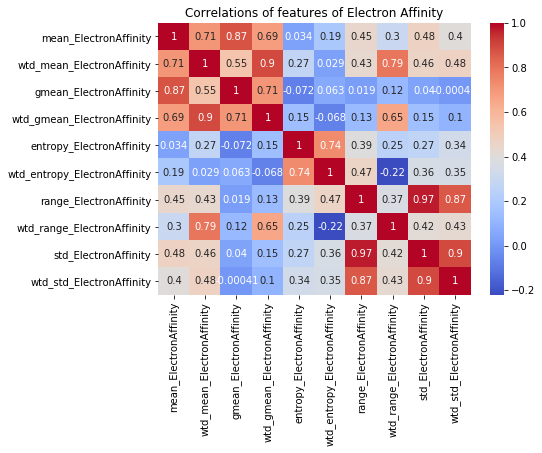

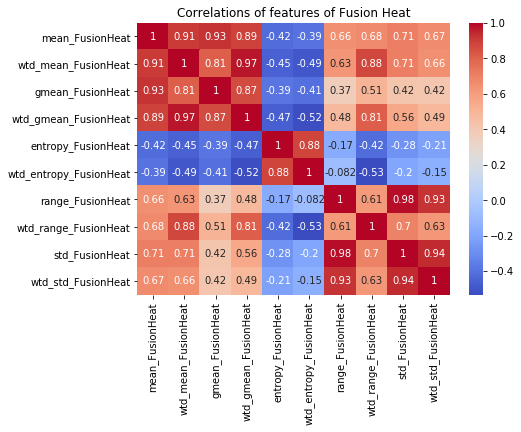

In [12]:
#correlation map of property with their features
plt.figure(figsize=[7,5])
sns.heatmap(electron.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Electron Affinity')
plt.show()
plt.figure(figsize=[7,5])
sns.heatmap(fusion.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Fusion Heat')
plt.show()

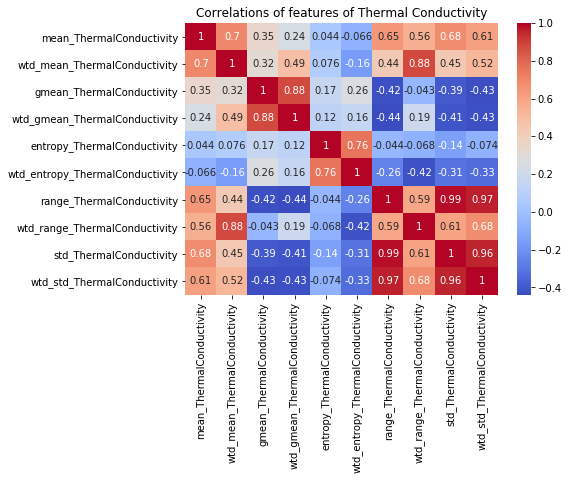

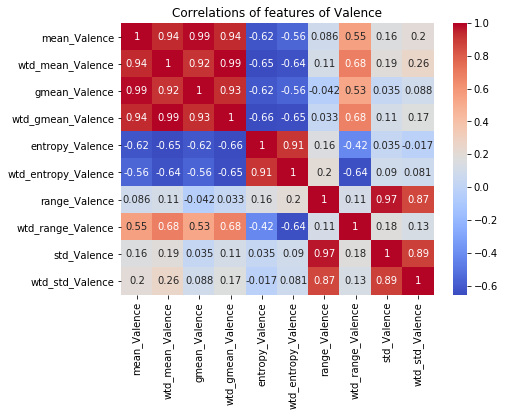

In [13]:
#correlation map of property with their features
plt.figure(figsize=[7,5])
sns.heatmap(thermal.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Thermal Conductivity')
plt.show()
plt.figure(figsize=[7,5])
sns.heatmap(valence.corr(), annot=True, cmap="coolwarm")
plt.title('Correlations of features of Valence')
plt.show()

In [14]:
#principal component analysis
scaler = StandardScaler()
x = data.drop(["critical_temp"],axis = 1).values
x = scaler.fit_transform(x)
pca = PCA(n_components=81)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=81, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([3.89317982e-01, 1.04822088e-01, 9.52120001e-02, 7.90773008e-02,
       5.88218289e-02, 3.78836850e-02, 3.62225141e-02, 3.10710704e-02,
       2.36111258e-02, 1.97787961e-02, 1.82836690e-02, 1.45859739e-02,
       1.17844636e-02, 9.98553996e-03, 9.82476180e-03, 7.81519491e-03,
       7.18792707e-03, 5.43466303e-03, 4.83327429e-03, 3.81676544e-03,
       3.02273402e-03, 2.86551931e-03, 2.56483087e-03, 2.07111321e-03,
       1.97217790e-03, 1.86288155e-03, 1.70037886e-03, 1.42592696e-03,
       1.26293775e-03, 1.15126820e-03, 1.02409524e-03, 9.60418058e-04,
       9.19262047e-04, 7.18768361e-04, 6.84926194e-04, 6.20909896e-04,
       5.70768973e-04, 4.92969125e-04, 4.36838348e-04, 4.22680910e-04,
       3.26131957e-04, 3.06014394e-04, 2.56985126e-04, 2.37423354e-04,
       2.23533453e-04, 2.15367493e-04, 1.96514704e-04, 1.87568040e-04,
       1.80761568e-04, 1.75226619e-04, 1.56382702e-04, 1.53806025e-04,
       1.26712099e-04, 1.20097048e-04, 1.17862387e-04, 1.05461044e-04,
      

In [16]:
#cumulative PCA
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1 = pd.DataFrame(var1)
var1.index = var1.index+1
var1.columns = ["Cumulative Explained Variance"]
var1.index = ["P" + str(i) for i in range(1,82)] #starting at 63 are useless
var1

,Cumulative Explained Variance
P1,38.93
P2,49.41
P3,58.93
P4,66.84
P5,72.72
...,...
P77,99.99
P78,99.99
P79,99.99
P80,99.99


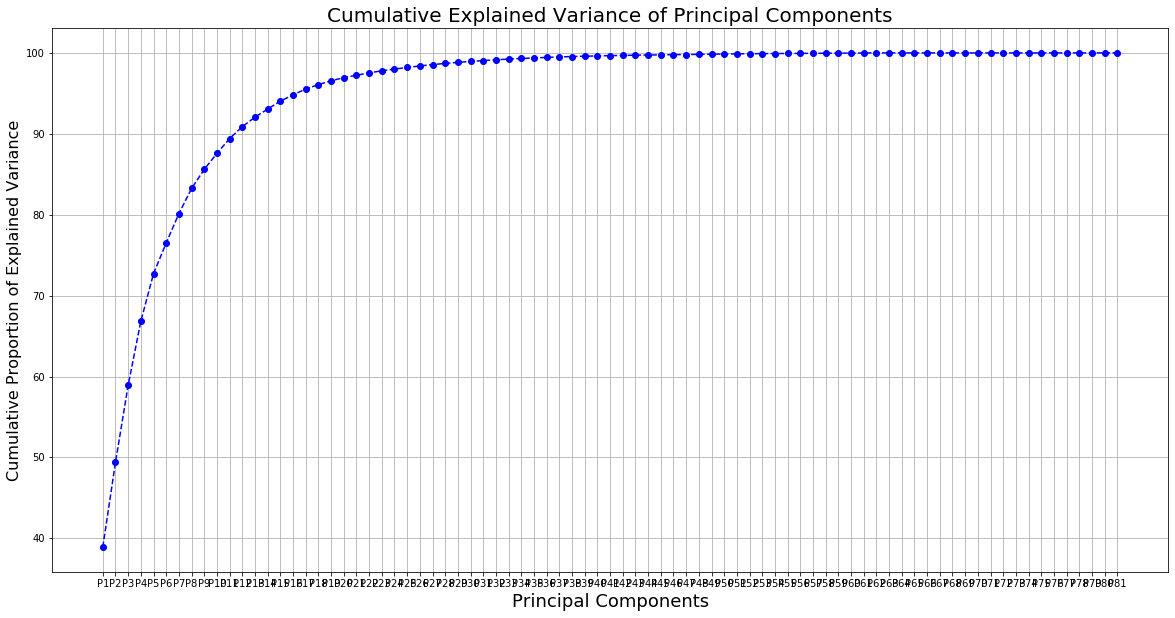

In [17]:
#plot cumulative PCA
plt.figure(figsize=(20,10))
plt.plot(var1,'--bo')
plt.title('Cumulative Explained Variance of Principal Components', fontsize=20)
plt.xlabel('Principal Components', fontsize=18)
plt.ylabel('Cumulative Proportion of Explained Variance', fontsize=16)
plt.grid()

In [18]:
#explained variance of each component
var2 = pd.DataFrame(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var2.index = var2.index+1
var2.columns = ["Explained Variance"]
var2.index = ["P" + str(i) for i in range(1,82)]
var2

,Explained Variance
P1,38.93
P2,10.48
P3,9.52
P4,7.91
P5,5.88
...,...
P77,0.00
P78,0.00
P79,0.00
P80,0.00


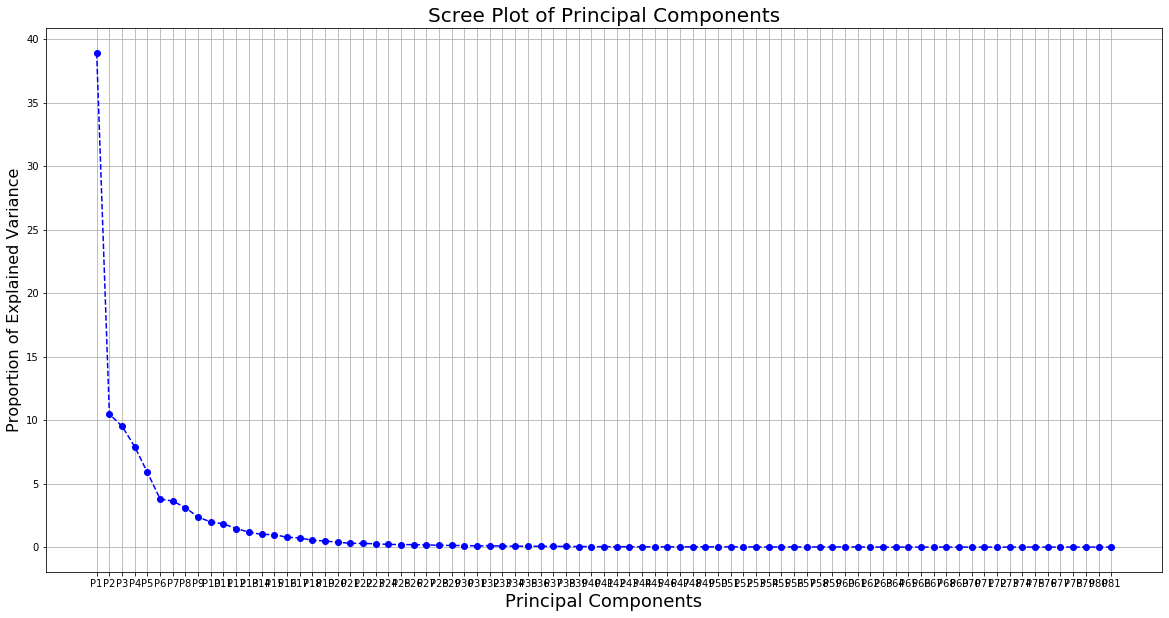

In [19]:
#scree plot of explained variance of each component
plt.figure(figsize=(20,10))
plt.plot(var2,'--bo')
plt.title('Scree Plot of Principal Components', fontsize=20)
plt.xlabel('Principal Components', fontsize=18)
plt.ylabel('Proportion of Explained Variance', fontsize=16)
plt.grid()

In [20]:
#obtain the correlation between variables and the first principal componenet
components_applied = DataFrame(pca.transform(data.drop("critical_temp",axis=1)))
components_applied.columns = ["P" + str(i) for i in range(1,82)]
for p in ["P1"]:
    new_df = data.copy()
    new_df[p] = components_applied[p]
    p1 = DataFrame(new_df.corr().round(2)[p]).drop(p,0)

In [21]:
#obtain the most 20 explained variables
p1_head = p1.sort_values(by = "P1", ascending = False).head(10)
p1_head.columns = ["Most contributed features in P1"]
p1_head

,Most contributed features in P1
wtd_gmean_Density,0.99
gmean_Density,0.96
wtd_mean_Density,0.91
wtd_gmean_atomic_mass,0.84
wtd_gmean_Valence,0.81
wtd_gmean_atomic_radius,0.81
mean_Density,0.81
gmean_Valence,0.80
wtd_mean_Valence,0.79
mean_Valence,0.79


In [22]:
#obtain the least 20 explained variables
p1_tail = p1.sort_values(by = "P1", ascending = False).tail(10)
p1_tail.columns = ["Least contributed features in P1"]
p1_tail

,Least contributed features in P1
entropy_Valence,-0.68
wtd_entropy_atomic_mass,-0.68
wtd_mean_fie,-0.69
wtd_entropy_atomic_radius,-0.73
std_fie,-0.81
std_atomic_radius,-0.82
range_fie,-0.83
wtd_std_fie,-0.84
range_atomic_radius,-0.84
wtd_std_atomic_radius,-0.85


([<matplotlib.axis.XTick at 0x1a23fe77d0>,
 <a list of 38 Text xticklabel objects>)

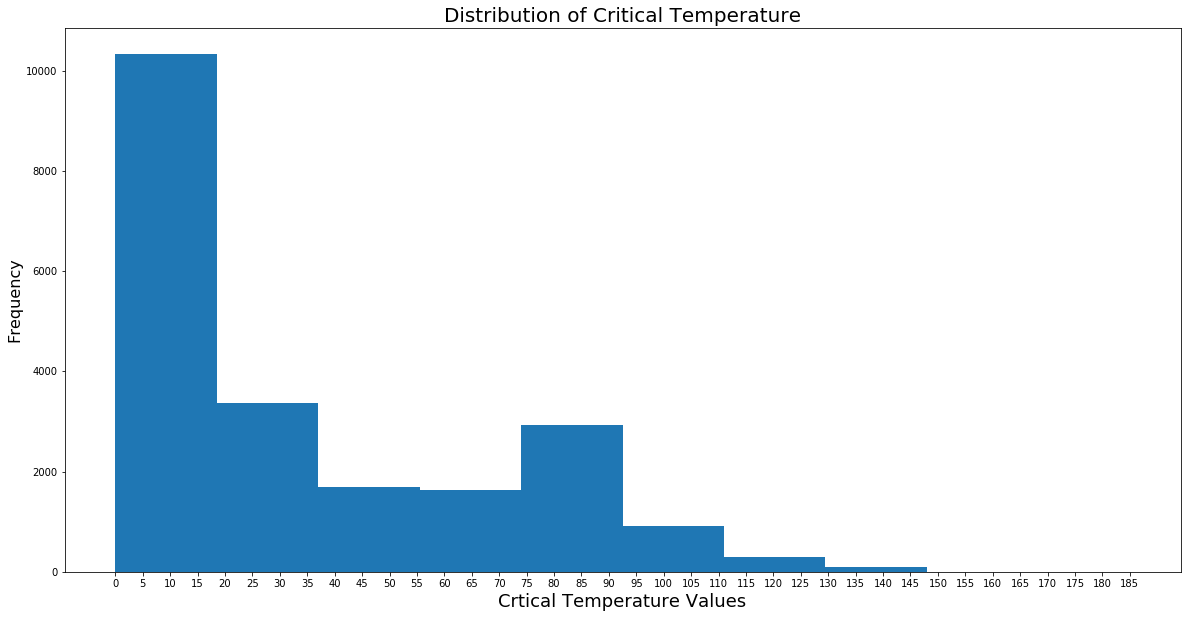

In [23]:
#plot of distribution of critical temperature
plt.figure(figsize=(20, 10))
plt.hist(data["critical_temp"].values)
plt.title('Distribution of Critical Temperature', fontsize=20)
plt.xlabel('Crtical Temperature Values', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(np.arange(min(data["critical_temp"].values), max(data["critical_temp"].values)+1, 5.0))

In [24]:
#declare predictor variables and observed variable
X = data.drop(["critical_temp"],axis=1)
features = X.columns
Y = data["critical_temp"]
#split data into train,test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=21)
#scale the data
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [25]:
#Use PCA to reduce dimensions
pca=PCA(0.90)
train_data=pca.fit_transform(scaled_X_train)
test_data=pca.transform(scaled_X_test)

In [26]:
#Linear regression
linear_model=LinearRegression()
linear_model.fit(train_data,Y_train)
mlr_predicted=linear_model.predict(test_data)
mlr_RMSE =np.sqrt(mean_squared_error(Y_test,mlr_predicted))
print(mlr_RMSE)
r2_score(Y_test,mlr_predicted)

21.877582693819228


0.5945268025726214

In [27]:
#Random Forest regressor

random_forest=RandomForestRegressor(n_estimators=100,oob_score=True,random_state=21,verbose=1,max_depth=10)
random_forest.fit(train_data,Y_train)
rf_predicted=random_forest.predict(test_data)
rf_RMSE=np.sqrt(mean_squared_error(Y_test,rf_predicted))
print(rf_RMSE)
r2_score(Y_test,rf_predicted)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


12.405497920338618


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8696257316697895

In [28]:
#Bagging
bagging = BaggingRegressor(n_estimators=100,oob_score=True,random_state=21,verbose=1)
bagging.fit(train_data,Y_train)
bag_predicted = bagging.predict(test_data)
bag_RMSE = np.sqrt(mean_squared_error(Y_test,bag_predicted))
print(bag_RMSE)
r2_score(Y_test,bag_predicted)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s finished


10.441594120677586


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


0.9076371981763793

In [29]:
#XGBoost
boost = XGBRegressor(n_estimators=100,random_state=21,verbose=1,max_depth=10)
boost.fit(train_data,Y_train)
boost_predicted = boost.predict(test_data)
boost_RMSE = np.sqrt(mean_squared_error(Y_test,boost_predicted))
print(boost_RMSE)
r2_score(Y_test,boost_predicted)

[23:49:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
10.834902835961335


0.9005479989856852

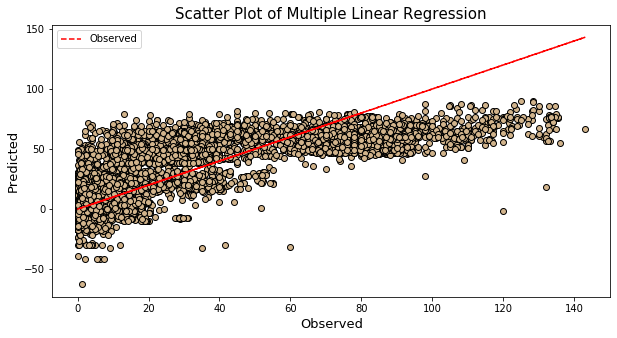

In [30]:
#plot of multiple linear regression
plt.figure(figsize=(10, 5))
plt.scatter(Y_test,mlr_predicted, c = "tan",edgecolors="black")
plt.plot(Y_test,Y_test,'r--',label = 'Observed')
plt.title('Scatter Plot of Multiple Linear Regression', fontsize=15)
plt.xlabel('Observed', fontsize=13)
plt.ylabel('Predicted', fontsize=13)
plt.legend()

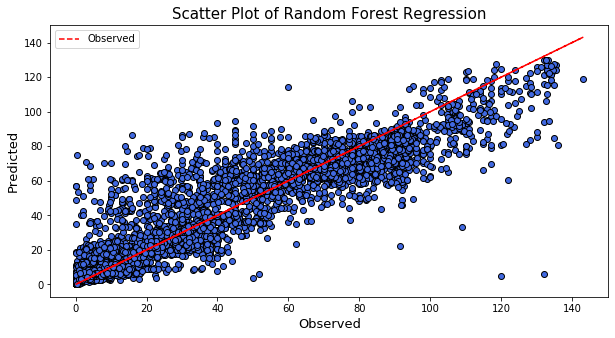

In [31]:
#plot of random forest
plt.figure(figsize=(10, 5))
plt.scatter(Y_test,rf_predicted, c = "royalblue",edgecolors="black")
plt.plot(Y_test,Y_test,'r--',label = 'Observed')
plt.title('Scatter Plot of Random Forest Regression', fontsize=15)
plt.xlabel('Observed', fontsize=13)
plt.ylabel('Predicted', fontsize=13)
plt.legend()

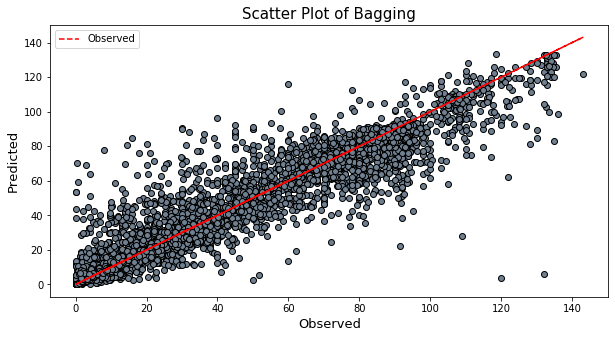

In [32]:
#plot of bagging
plt.figure(figsize=(10, 5))
plt.scatter(Y_test,bag_predicted, c = "slategray",edgecolors="black")
plt.plot(Y_test,Y_test,'r--',label = 'Observed')
plt.title('Scatter Plot of Bagging', fontsize=15)
plt.xlabel('Observed', fontsize=13)
plt.ylabel('Predicted', fontsize=13)
plt.legend()

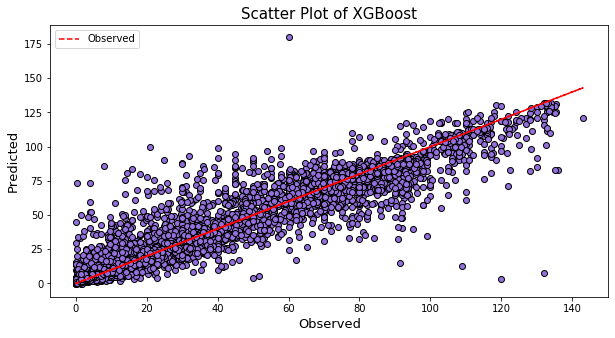

In [33]:
#plot of xgboost
plt.figure(figsize=(10, 5))
plt.scatter(Y_test,boost_predicted, c = "mediumpurple",edgecolors="black")
plt.plot(Y_test,Y_test,'r--',label = 'Observed')
plt.title('Scatter Plot of XGBoost', fontsize=15)
plt.xlabel('Observed', fontsize=13)
plt.ylabel('Predicted', fontsize=13)
plt.legend(loc = "upper left")